--- 
authors: Chinming Zhu
updated: december 3, 2025    
---
# Bepaling van soortelijke warmte van water


# Introductie

De **soortelijke warmte** (warmtecapaciteit per kilogram) van een stof geeft aan hoeveel energie nodig is om de temperatuur van die stof met **1 K (≈ 1 °C)** te verhogen.  
Water heeft een relatief grote soortelijke warmte, wat je in het dagelijks leven merkt: water warmt (en koelt) langzaam op en dempt daardoor temperatuurwisselingen.

In deze proef bepalen we de soortelijke warmte van water door een **bekende elektrische energie** aan een waterbad toe te voegen met een dompelweerstand. Door de **temperatuurstijging** van het water te meten en de **massa** van het water te kennen, kunnen we de soortelijke warmte $c$ van water berekenen.


# Theorie

Als een hoeveelheid warmte $Q$ wordt toegevoerd aan een massa $m$ van een stof, stijgt de temperatuur met $\Delta T$ volgens:

$$
Q = m\,c\,\Delta T
$$

waarbij:
- $Q$ de toegevoerde warmte-energie is (J),
- $m$ de massa is (kg),
- $c$ de soortelijke warmte is (J\,kg$^{-1}$\,K$^{-1}$),
- $\Delta T$ de temperatuurverandering is (K of °C).

In deze proef is $Q$ afkomstig van elektrische energie. Bij (ongeveer) constante spanning $U$ en stroom $I$ geldt:

$$
P = U\,I
$$

en met een verwarmtijd $t$:

$$
Q = P\,t = U\,I\,t
$$

Combineren geeft voor de gezochte soortelijke warmte:

$$
c = \frac{Q}{m\,\Delta T} = \frac{U\,I\,t}{m\,\Delta T}
$$

Als er meerdere temperatuurmetingen $T(t)$ beschikbaar zijn, kan ook de helling $\mathrm{d}T/\mathrm{d}t$ worden bepaald (bijv. via een lineaire fit). Dan geldt:

$$
c = \frac{P}{m\,(\mathrm{d}T/\mathrm{d}t)}
$$

**Aannames:** alle elektrische energie gaat (bij benadering) naar het water en warmteverliezen naar omgeving, beker en element zijn klein of worden in de onzekerheid meegenomen.


# Methode en materialen

## Ontwerp
Een waterbad met bekende massa $m$ aan water wordt verwarmd met een elektrisch dompel‑verwarmingselement (weerstand) dat een bekende hoeveelheid energie levert.  
De temperatuur van het water wordt gemeten met een thermometer of temperatuursensor. Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.

## Materialen
- Maatbeker / bekerglas  
- Weegschaal  
- Water  
- Elektrisch verwarmingselement (bijv. $10\,\Omega$, geschikt voor enkele tientallen watt)  
- Voedingsbron (DC)  
- Thermometer / temperatuursensor  
- Roerder (of handmatig roeren)  
- Stopwatch / timer  

## Werkwijze (globaal)
1. Weeg de massa water (bij voorkeur in **kg**; noteer ook de onzekerheid van de weegschaal).  
2. Meet de begintemperatuur $T_\mathrm{b}$ van het water en start met roeren.  
3. Zet de voedingsbron aan en houd (zo goed mogelijk) een constante spanning $U$ en stroom $I$ aan.  
4. Verwarm gedurende een bekende tijd $t$ en registreer de temperatuur $T(t)$ (of tenminste een eindtemperatuur $T_\mathrm{e}$).  
5. Zet de voeding uit en meet de eindtemperatuur $T_\mathrm{e}$.

## Veiligheid
We maken gebruik van een (laag‑ohmse) weerstand die snel heet kan worden.  
- Zet de bronspanning alleen aan wanneer de weerstand **onder water** zit.  
- Raak de weerstand niet aan tijdens/na het verwarmen (verbrandingsgevaar).  
- Gebruik roeren om lokale oververhitting te voorkomen.  
- Houd het vermogen onder het afgesproken maximum (bijv. $\le 40\,\mathrm{W}$).

## Data analyse
1. Bereken het elektrisch vermogen: $P = U\,I$.  
2. Bereken de toegevoegde energie: $Q = P\,t$.  
3. Bepaal de temperatuurstijging: $\Delta T = T_\mathrm{e}-T_\mathrm{b}$.  
4. Bereken de soortelijke warmte: $c = Q/(m\,\Delta T)$.  
5. Vergelijk de uitkomst met de literatuurwaarde van water (rond kamertemperatuur ongeveer $\sim 4{,}18\,\mathrm{kJ\,kg^{-1}\,K^{-1}}$) en bespreek mogelijke fouten (warmteverlies, warmtecapaciteit beker/element, meetonnauwkeurigheden).


# Resultaten

In deze sectie rapporteren we de gemeten waarden en de berekende soortelijke warmte van water.  
Onderstaande code rekent de toegevoegde energie $Q$ uit, bepaalt $\Delta T$ en berekent vervolgens $c$.

Daarnaast is een eenvoudige grafiek van de temperatuur als functie van de tijd opgenomen (met de beschikbare meetpunten).  


In [1]:
# Hier de data en de analyse

import numpy as np
import pandas as pd

# Meetdata (SI-eenheden waar mogelijk)
T_b_water = 15.9   # begintemperatuur water (°C)
T_e_water = 16.9   # eindtemperatuur water (°C)
U = 9.7            # spanning (V)
I = 1.0            # stroom (A)

m_water = 0.473    # massa water (kg)  -> 0.473 kg = 473 g
t_e = 204          # verwarmingstijd (s)

# Berekeningen
P = U * I                          # vermogen (W)
Q = P * t_e                        # toegevoegde energie (J)
dT = T_e_water - T_b_water         # temperatuurstijging (K of °C)

c_exp = Q / (m_water * dT)         # experimentele soortelijke warmte (J/(kg K))

# Literatuurwaarde (orde van grootte rond kamertemperatuur)
c_lit = 4182.0                     # J/(kg K)
rel_diff = (c_exp - c_lit) / c_lit * 100  # procent

results = pd.DataFrame({
    "grootheid": ["P", "Q", "ΔT", "c (experiment)", "c (literatuur)", "relatief verschil"],
    "waarde":   [P,   Q,   dT,   c_exp,            c_lit,           rel_diff],
    "eenheid":  ["W", "J", "K", "J/(kg·K)",        "J/(kg·K)",      "%"]
})

results


,grootheid,waarde,eenheid
0,P,9.700000,W
1,Q,1978.800000,J
2,ΔT,1.000000,K
3,c (experiment),4183.509514,J/(kg·K)
4,c (literatuur),4182.000000,J/(kg·K)
5,relatief verschil,0.036095,%


In [2]:
#  
# 
# 



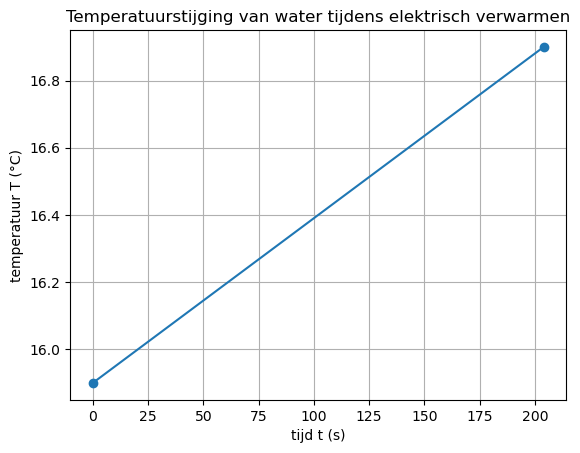

Vermogen P = 9.70 W
Toegevoegde energie Q = 1978.8 J
Temperatuurstijging ΔT = 1.00 °C
Soortelijke warmte c = 4184 J/(kg·K)
Relatief verschil t.o.v. literatuur (4182 J/(kg·K)) = 0.04 %


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Maak map voor figuren (als die nog niet bestaat)
os.makedirs("figures", exist_ok=True)

# Tijd- en temperatuursdata (hier alleen begin- en eindpunt beschikbaar)
t = np.array([0, t_e])
T = np.array([T_b_water, T_e_water])

# Slope (handig als je later meer meetpunten hebt)
slope = (T_e_water - T_b_water) / t_e  # °C/s

plt.figure()
plt.plot(t, T, marker="o")
plt.xlabel("tijd t (s)")
plt.ylabel("temperatuur T (°C)")
plt.title("Temperatuurstijging van water tijdens elektrisch verwarmen")
plt.grid(True)

plt.savefig("figures/temperatuur_vs_tijd.png", dpi=450)
plt.show()

print(f"Vermogen P = {P:.2f} W")
print(f"Toegevoegde energie Q = {Q:.1f} J")
print(f"Temperatuurstijging ΔT = {dT:.2f} °C")
print(f"Soortelijke warmte c = {c_exp:.0f} J/(kg·K)")
print(f"Relatief verschil t.o.v. literatuur ({c_lit:.0f} J/(kg·K)) = {rel_diff:.2f} %")


# Discussie en conclusie

Uit de metingen volgt:

- $P = U\,I \approx 9{,}7\,\mathrm{W}$  
- $Q = P\,t \approx 2{,}0\,\mathrm{kJ}$  
- $\Delta T \approx 1{,}0\,\mathrm{K}$  
- $c \approx 4{,}18\times 10^3\,\mathrm{J\,kg^{-1}\,K^{-1}}$

Deze waarde ligt (bij deze data) zeer dicht bij de literatuurwaarde van water rond kamertemperatuur ($\approx 4{,}18\,\mathrm{kJ\,kg^{-1}\,K^{-1}}$). Een klein verschil kan verklaard worden door:

- **Warmteverlies** naar de omgeving (convectie/straling) en naar de maatbeker/thermometer. Dit zorgt er meestal voor dat niet alle elektrische energie het water opwarmt.  
- **Niet-constante spanning of stroom** tijdens het verwarmen (waardoor $P$ niet perfect constant is).  
- **Meetonnauwkeurigheid** in $\Delta T$ (vaak de grootste invloed als $\Delta T$ klein is), massameting en tijdmeting.  
- **Onvoldoende roeren**, waardoor de sensor lokaal een iets andere temperatuur kan meten dan het gemiddelde van het water.

**Conclusie:** op basis van de gegeven meetdata vinden we voor de soortelijke warmte van water  
$$
c \approx 4{,}18\,\mathrm{kJ\,kg^{-1}\,K^{-1}},
$$
wat overeenkomt met de verwachte waarde binnen de meetonnauwkeurigheid van de opstelling.
